# 3교시 4. 실데이터 적용 사례

## 1. 데이터 파악하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 집 값 데이터를 불러옵니다.
df = pd.read_csv("./data/house_train.csv")

# 데이터를 미리 살펴보겠습니다.
df

fatal: destination path 'data' already exists and is not an empty directory.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
# 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다.
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## 2. 결측치, 카테고리 변수 처리하기

In [3]:
# 속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [4]:
# 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.(원핫 인코딩)
df = pd.get_dummies(df)

# 결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다.
df = df.fillna(df.mean())

# 업데이트된 데이터 프레임을 출력해봅니다.
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


## 3. 속성별 관련도 추출하기

In [5]:
# 데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

# 집 값과 관련이 큰 것부터 순서대로 저장합니다.
df_corr_sort=df_corr.sort_values('SalePrice', ascending=False)

# 집 값과 관련도가 가장 큰 10개의 속성들을 출력합니다.
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

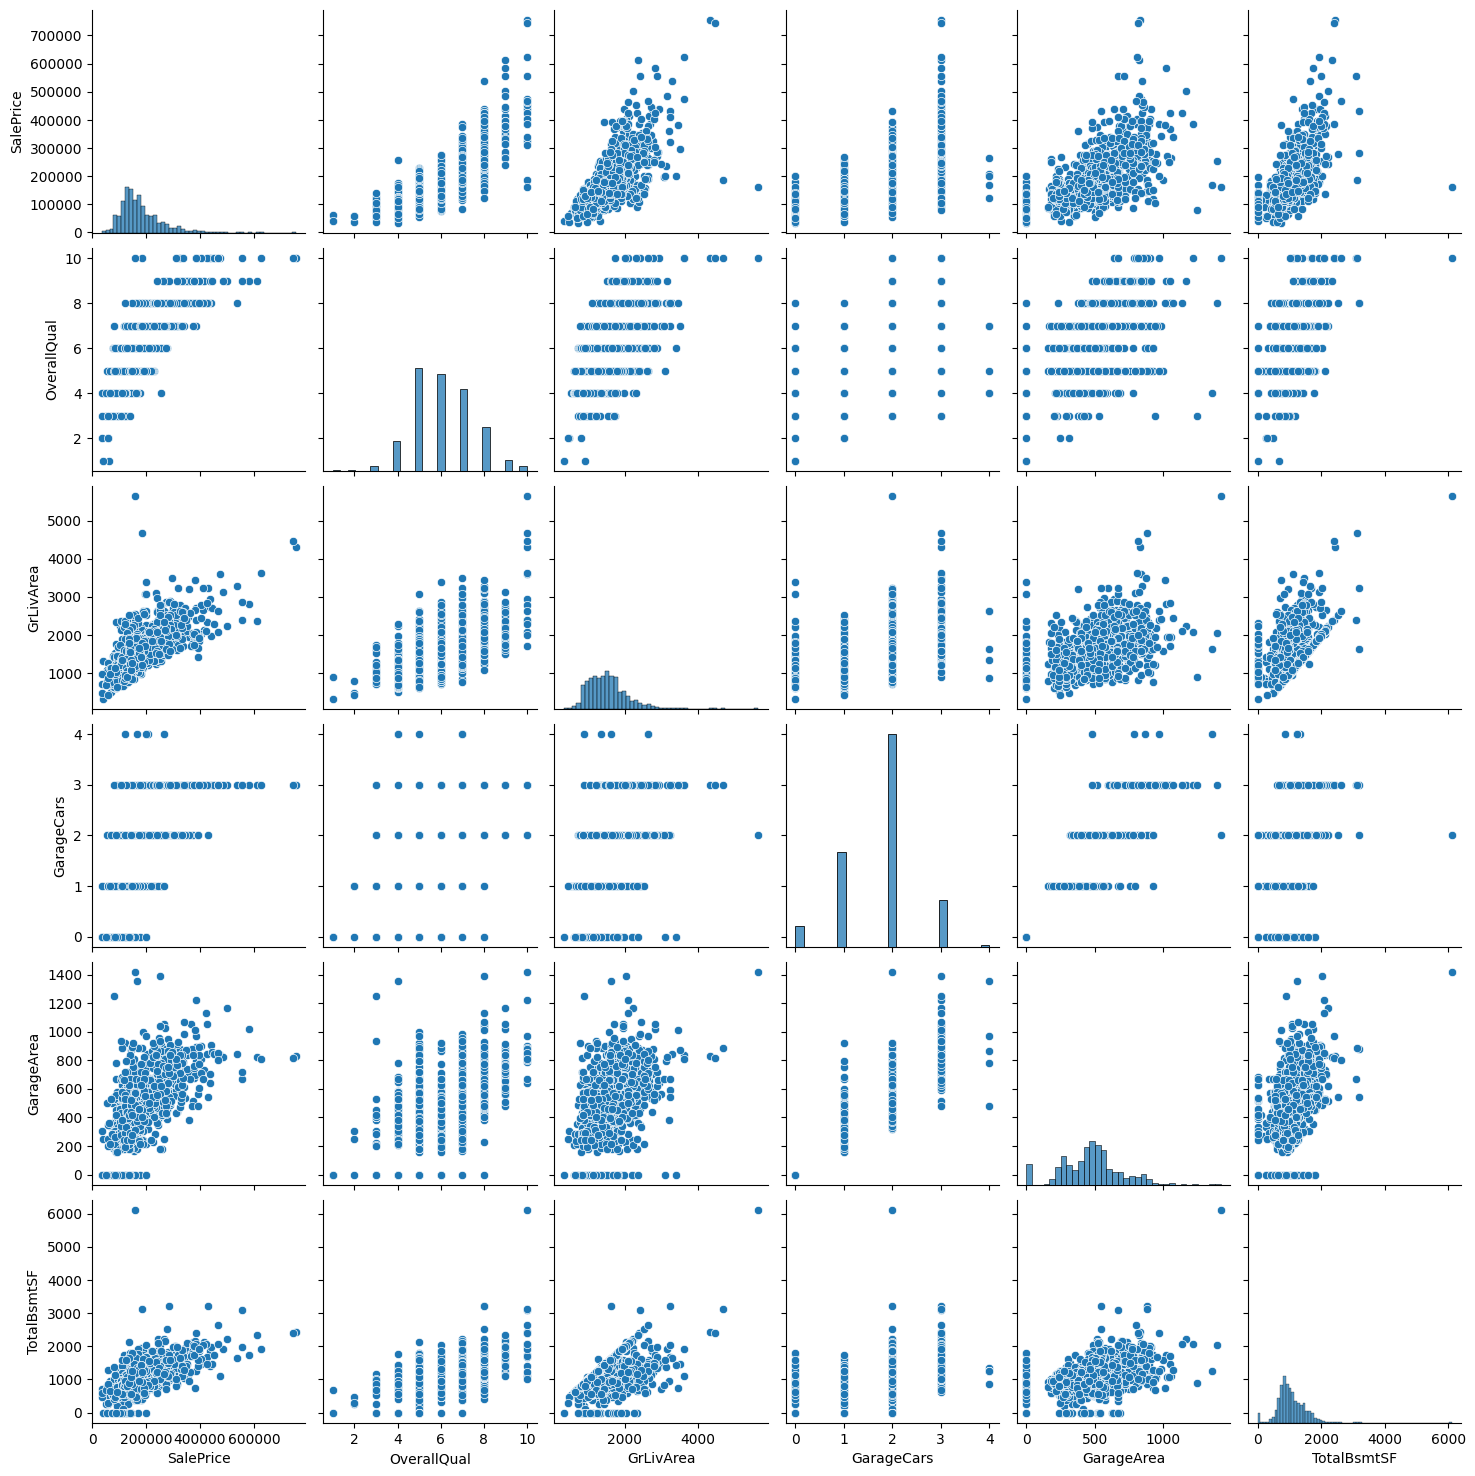

In [6]:
# 집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])
plt.show();

## 4. 주택 가격 예측 모델

In [7]:
# 집 값을 제외한 나머지 열을 저장합니다.
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

# 집 값을 저장합니다.
y = df['SalePrice'].values

In [8]:
# 전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [10]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="./data/model/Ch15-house.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,671 (6.53 KB)

 Trainable params: 1,671 (6.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40520024064.0000 - val_loss: 40473522176.0000
Epoch 2/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38519635968.0000 - val_loss: 40230551552.0000
Epoch 3/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41116000256.0000 - val_loss: 39630221312.0000
Epoch 4/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36747218944.0000 - val_loss: 38221193216.0000
Epoch 5/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35664715776.0000 - val_loss: 35221774336.0000
Epoch 6/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31764871168.0000 - val_loss: 29661808640.0000
Epoch 7/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27316533248.0000 - val_loss: 20708431872.0000
Epoch 8/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15582038016.0000 - val_loss: 10524971008.0000
Epoch 9/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6983953920.0000 - val_loss: 3867427584.0000
Epoch 10/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [11]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
실제가격: 136905.00, 예상가격: 225909.42
실제가격: 190000.00, 예상가격: 275942.88
실제가격: 190000.00, 예상가격: 245403.16
실제가격: 320000.00, 예상가격: 328357.53
실제가격: 437154.00, 예상가격: 314208.81
실제가격: 187500.00, 예상가격: 159280.05
실제가격: 101000.00, 예상가격: 117771.07
실제가격: 101800.00, 예상가격: 113780.48
실제가격: 118000.00, 예상가격: 129397.95
실제가격: 320000.00, 예상가격: 247002.77
실제가격: 200000.00, 예상가격: 182765.73
실제가격: 197000.00, 예상가격: 183832.97
실제가격: 110000.00, 예상가격: 117650.88
실제가격: 84000.00, 예상가격: 76464.31
실제가격: 290000.00, 예상가격: 271970.69
실제가격: 161750.00, 예상가격: 143875.69
실제가격: 168500.00, 예상가격: 165585.88
실제가격: 139000.00, 예상가격: 140343.42
실제가격: 155000.00, 예상가격: 143282.47
실제가격: 171000.00, 예상가격: 187074.81
실제가격: 98000.00, 예상가격: 95365.93
실제가격: 325000.00, 예상가격: 289813.47
실제가격: 119750.00, 예상가격: 122318.24
실제가격: 210000.00, 예상가격: 195973.28
실제가격: 244400.00, 예상가격: 227637.59


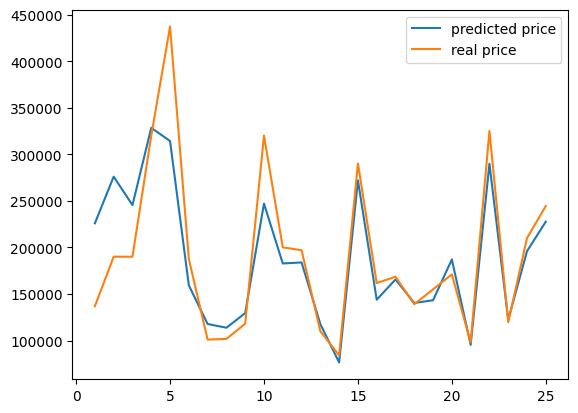

In [12]:
# 그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()